<a href="https://colab.research.google.com/github/PPSolanki/DA_Lab/blob/main/Exp_4_Pratham_P_Solanki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("climate_change.csv")
print(data.shape)
data.head(10)

(308, 11)


,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [3]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]# removing outliers in data

In [4]:
def get_corr_coef(data, col):
  for i in data.columns:
    if(i != col):
      r = np.corrcoef(data[col], data[i])
      print("The correlation coefficient of {} and {} is {}".format(col, i, r[1][0]))

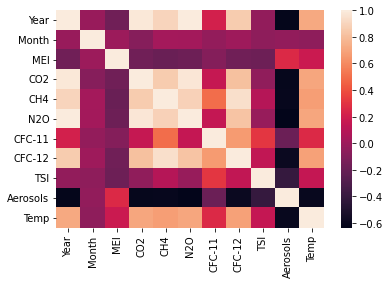

In [5]:
c = data.corr()
sns.heatmap(c)

From the heat map we can see that the attributes CO2, CH4,N20 and CFC-12 are highly correlated with the target attribute temperature.

In [6]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data[['Temp']]

x_const = sm.add_constant(x)
model = sm.OLS(y, x_const) 
results = model.fit() 

print('The condition number is ',results.condition_number)
p_df=pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})
print("The attributes with pvalue less than 0.05 are as follows")
p_df[ p_df['pvalue']<0.05 ]

The condition number is  9937148.489619825
The attributes with pvalue less than 0.05 are as follows


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-60.837790,0.011
MEI,0.066470,0.000
CFC-12,0.002671,0.031
TSI,0.044867,0.012
Aerosols,-8.233947,0.000


There is high multicolliniarity as the condition number is very high. CFC-12, TSI, AEROSOLS and MEI have p values less than 0.05

**First Model**

In [7]:
df1 = data[data.iloc[:,0]<=2006]  
df2 = data[data.iloc[:,0]>2006]  

x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data['Temp']

x_train = df1[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = df1['Temp']
x_test = df2[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',  'CFC-12', 'TSI', 'Aerosols']]
y_test = df2['Temp']
# 'CO2', 'CH4', 'N2O', 'CFC-11',

print('shape of df1 = ',df1.shape)
print('shape of df2 = ',df2.shape)

shape of df1 =  (219, 11)
shape of df2 =  (24, 11)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(x_train, y_train)

print("Intercept: ", lr.intercept_)
print("Coefficients:")
print(list(zip(x, lr.coef_)))

y_pred_lr= lr.predict(x_test)

Intercept:  -51.031969159858036
Coefficients:
[('MEI', 0.06223569777302381), ('CO2', 0.0049606987940408465), ('CH4', -0.00038810727802363575), ('N2O', 0.0018262419311547184), ('CFC-11', -0.0011344993284555694), ('CFC-12', 0.0014013277032073551), ('TSI', 0.03604734063953119), ('Aerosols', -8.435947559286046)]


In [9]:
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
284,0.601,0.473959
285,0.498,0.450364
286,0.435,0.433475
287,0.466,0.434303
288,0.372,0.454074


In [10]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('R squared: ',lr.score(x,y)*100)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared:  69.6944214745464
Mean Absolute Error: 0.07881358260266709
Mean Square Error: 0.01062595645613692
Root Mean Square Error: 0.10308228002977486


In [11]:
get_corr_coef(data= x_train, col='N2O')

The correlation coefficient of N2O and MEI is -0.06177124908370091
The correlation coefficient of N2O and CO2 is 0.9749926361365618
The correlation coefficient of N2O and CH4 is 0.8903124993701752
The correlation coefficient of N2O and CFC-11 is 0.3273891567210462
The correlation coefficient of N2O and CFC-12 is 0.8645200386566597
The correlation coefficient of N2O and TSI is 0.15958759016062263
The correlation coefficient of N2O and Aerosols is -0.6609381809526801


N2O is highly correlated with CO2,CH4,CFC-12 with correlation coefficient more than 0.7

In [12]:
get_corr_coef(data= x_train, col='CFC-11')

The correlation coefficient of CFC-11 and MEI is -0.16610201966431865
The correlation coefficient of CFC-11 and CO2 is 0.34154482148525867
The correlation coefficient of CFC-11 and CH4 is 0.627913787898016
The correlation coefficient of CFC-11 and N2O is 0.3273891567210462
The correlation coefficient of CFC-11 and CFC-12 is 0.7493680735584559
The correlation coefficient of CFC-11 and TSI is 0.2571940874708528
The correlation coefficient of CFC-11 and Aerosols is -0.23054354377641395


CFC-11 and CFC-12 are higly correlated

**Second Model**

In [13]:
x_train_1 = df1[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_train_1 = df1['Temp']
x_test_1 = df2[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_test_1 = df2['Temp']
x_1 = data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_1 = data[['Temp']]

In [14]:
X2_train_1 = sm.add_constant(x_train_1)
est_train_1 = sm.OLS(y_train_1, X2_train_1)
est2_1 = est_train_1.fit()
print(est2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           8.92e-56
Time:                        15:37:24   Log-Likelihood:                 223.51
No. Observations:                 219   AIC:                            -437.0
Df Residuals:                     214   BIC:                            -420.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.1366     23.146     -2.296      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

x_const = sm.add_constant(x_1)
model = sm.OLS(y_1, x_const) 
results = model.fit() 

print('The condition number is ',results.condition_number)
p_df=pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})
print("The attributes with pvalue less than 0.05 are as follows")
p_df[ p_df['pvalue']<0.05 ]

The condition number is  5534536.181884937
The attributes with pvalue less than 0.05 are as follows


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-72.195748,0.002
MEI,0.068912,0.000
N2O,0.019522,0.000
TSI,0.048618,0.004
Aerosols,-9.060785,0.000


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(x_train_1, y_train_1)

LinearRegression()

In [17]:
print("Intercept: ", lr.intercept_)
print("Coefficients:")
print(list(zip(x_1, lr.coef_)))

#Prediction of test set
y_pred_lr_1= lr.predict(x_test_1)


Intercept:  -53.13657186298024
Coefficients:
[('MEI', 0.06057100564913947), ('N2O', 0.0217419646685703), ('TSI', 0.03415981688806212), ('Aerosols', -8.37144911641541)]


In [18]:
lr_diff_1 = pd.DataFrame({'Actual value': y_test_1, 'Predicted value': y_pred_lr_1})
lr_diff_1.head()

,Actual value,Predicted value
284,0.601,0.499497
285,0.498,0.474026
286,0.435,0.453502
287,0.466,0.444320
288,0.372,0.459123


In [19]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test_1, y_pred_lr_1)
meanSqErr = metrics.mean_squared_error(y_test_1, y_pred_lr_1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_lr_1))
print('R squared: {:.2f}'.format(lr.score(x_1,y_1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 67.00
Mean Absolute Error: 0.09020686837753002
Mean Square Error: 0.013717618459981736
Root Mean Square Error: 0.11712223725655917


The variables having P-Value less than 0.05 are CFC-12, TSI, Aerosols and MEI

The R-squared value for the first model with all the variables is 69.69

N20 and CFC-11 were correlated with all the variables and it was found that:

a. N2O was correlated with CO2, CH4, CFC-12 and the correlation coefficient was greater than 0.7

b. CFC-11 was corelated with CFC-12 and the correlation coefficient is greater than 0.7

Therefore the third statement [III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.]

Is true as the concentration increased with passsage of time

Now a second model with only N20, Mei, TSI and Aerosols is trained.

a. The coeffcient of N2O in this model is = 0.0217

In the previous model the coefficient of N2O was = 0.001826

So the coefficient has increased in this model suggesting that N2O has a greater influence on this model than the previous one.

b. The R-sqaured value of the new model is 67.00 which has been decreased from the previous model which was 69.69. So the first model is a better model for our varibles than our previous models.